<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

>[Content](#scrollTo=RKTM_DZbnm1V)

>[Unsupervised Machine Learning](#scrollTo=fNsrvXIknm5A)

>>[K-Means Clustering](#scrollTo=XcWJuXH_w0iP)

>>>[Objective Function for K-Means](#scrollTo=953aglEJh396)

>>>[Soft K-means](#scrollTo=xIN6RgU_lbcM)

>>>[K-Means Failing](#scrollTo=zseJzPtFsSHJ)

>>>[Evaluating Clustering](#scrollTo=5AsasZh9Jk_K)

>>>>[Purity](#scrollTo=aFobGlqGJvCA)

>>>>[Davies-Bouldin Index](#scrollTo=Wnh-_3qiK1pw)

>>>[Choosing K](#scrollTo=GlDamXgDOFSq)

>>[Hierarchical Clustering](#scrollTo=whPHGPQoI-PB)

>>>[Joining Clusters](#scrollTo=Y-zsWIj9KoR7)

>>>>[Single-Linkage](#scrollTo=d7U8XGOKLNHE)

>>>>[Complete-Linkage](#scrollTo=AOCHbjMjLPX7)

>>>>[Mean Distance (UPGMA)](#scrollTo=d6KVbxD6LiRx)

>>>>[Ward's Criterion](#scrollTo=mpa_c_xbL3lW)

>>>[Implementation](#scrollTo=ImQ40KUfMrxE)

>>>[Application Examples](#scrollTo=FKFBrBMyN5bt)

>>>>[DNA Sequence Clustering](#scrollTo=cinGgoGLRaGi)

>>>>[Tweet Clustering (TF-IDF)](#scrollTo=l68I2YbpRezq)

>>[Gaussian Mixture Model (GMM)](#scrollTo=pMu8cLQvWA8s)

>>>[Single Guassion](#scrollTo=d0CLvuXKWfg9)

>>>>[Log-Likelihood](#scrollTo=1NNc0LKfZdLi)

>>>[Mixture of Gaussians](#scrollTo=NQpEHxm6iIe4)

>>>[Expectation Maximization (EM)](#scrollTo=Oeh3qUfakACI)

>>>[Implementation](#scrollTo=W61Sjwt3ndaa)

>>>[Singular Covariance](#scrollTo=dR6gjuZbe7_j)

>>>[Kernel Density Estimation (KDE)](#scrollTo=g9DwcLC6hbgH)



# Unsupervised Machine Learning

To categorize unlabeld data

## K-Means Clustering

Initializing cluster centers by randomly choosing K points from X.

Loop,

Determine cluster identities for each of the data inputs.

calculate the mean of each cluster to find the **centroid** or **center of mass**.

Check for convergence to exit the loop



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 2
K = 3
N = 300

In [ ]:
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

X = np.zeros((N,D))
X[:100, :] = np.random.randn(100, D) + mu1
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:, :] = np.random.randn(100, D) + mu3

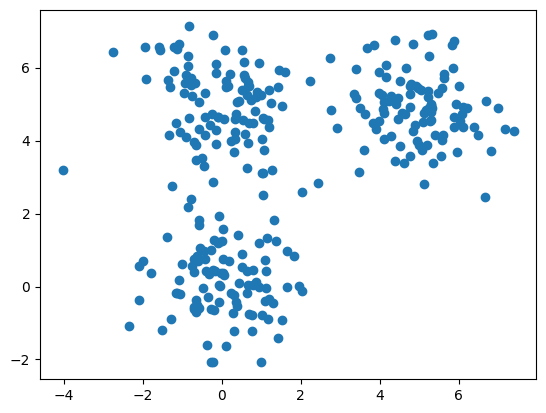

In [ ]:
plt.scatter(X[:,0], X[:,1])

In [ ]:
# Initialization
# Randomly assign cluster centers
cluster_centers = np.zeros((K,D))
for k in range(K):
  i = np.random.choice(N)
  cluster_centers[k] = X[i]

In [ ]:
# K-means loop
max_iters = 20
cluster_identities = np.zeros(N)
saved_cluster_identities = [] # for demo

for i in range(max_iters):
    # Check for convergence
    old_cluster_identities = cluster_identities.copy()
    saved_cluster_identities.append(old_cluster_identities)

    # Step 1: Determine cluster identities
    for n in range(N):
      closest_k = -1
      min_dist = float("inf")
      for k in range(K):
        d = (X[n] - cluster_centers[k]).dot(X[n] - cluster_centers[k])
        if d < min_dist:
          min_dist = d
          closest_k = k
      cluster_identities[n] = closest_k

    # Step 2: Recalculate means
    for k in range(K):
      cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    # Check for convergence
    if np.all(old_cluster_identities == cluster_identities):
      print(f"Converged on step {i}")
      break



Converged on step 3


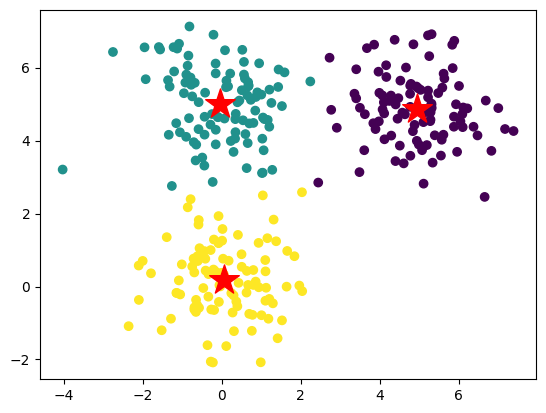

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster_identities)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=500, c='red', marker="*")

<ipython-input-17-24d0df5492a6>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(M,1,i+1)


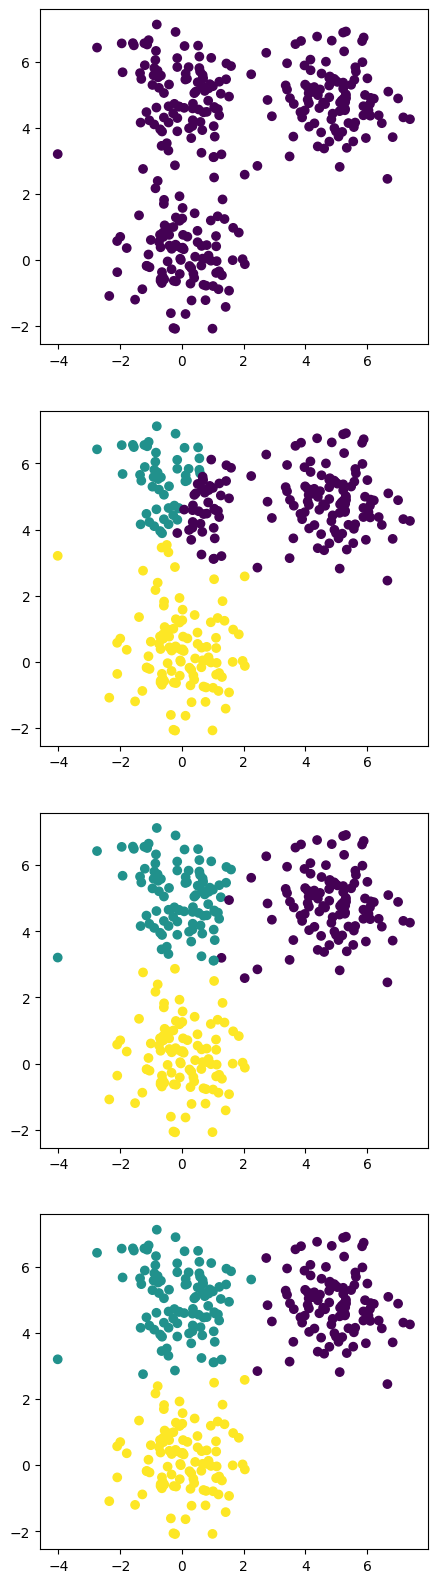

In [ ]:
# Show training progress
M =len(saved_cluster_identities)
fig, ax = plt.subplots(figsize=(5,5*M))
for i in range(M):
  plt.subplot(M,1,i+1)
  Y = saved_cluster_identities[i]
  plt.scatter(X[:,0],X[:,1], c=Y)

### Objective Function for K-Means

Objective / cost / loss / error all mean the same thing

> Cost is the squared distance between $X_n$ and the mean of whichever cluster it belongs to.

$$
J = \sum_{n=1}^N\sum_{k=1}^K 1 (y_n=k) \|x_n - m_k \|^2
$$

- $1 (y_n=k)$ is an indicator function, 1(true) = 1, 1(false) =0


Alternative notation

$$
J = \sum_{n=1}^N \min_k\|x_n-m_k\|^2
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 2
K = 3
N = 300
mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

X = np.zeros((N,D))
X[:100, :] = np.random.randn(100, D) + mu1
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:, :] = np.random.randn(100, D) + mu3

# Initialization, Randomly assign cluster centers
cluster_centers = np.zeros((K,D))
for k in range(K):
  i = np.random.choice(N)
  cluster_centers[k] = X[i]

In [ ]:
# K-means loop
max_iters = 20
cluster_identities = np.zeros(N)
min_dists = np.zeros(N)
costs = []

for i in range(max_iters):
    # Check for convergence
    old_cluster_identities = cluster_identities.copy()

    # Step 1: Determine cluster identities
    for n in range(N):
      closest_k = -1
      min_dist = float("inf")
      for k in range(K):
        d = (X[n] - cluster_centers[k]).dot(X[n] - cluster_centers[k])
        if d < min_dist:
          min_dist = d
          closest_k = k
      cluster_identities[n] = closest_k
      min_dists[n] = min_dist

    # Store the cost
    costs.append(min_dists.sum())

    # Step 2: Recalculate means
    for k in range(K):
      cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    # Check for convergence
    if np.all(old_cluster_identities == cluster_identities):
      print(f"Converged on step {i}")
      break



Converged on step 4


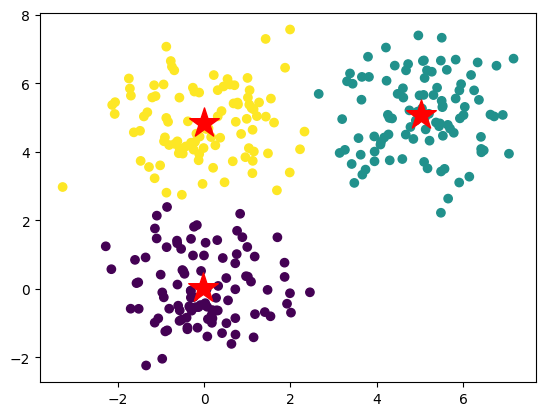

In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster_identities)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=500, c='red', marker="*")

Text(0.5, 0, 'Iteration')

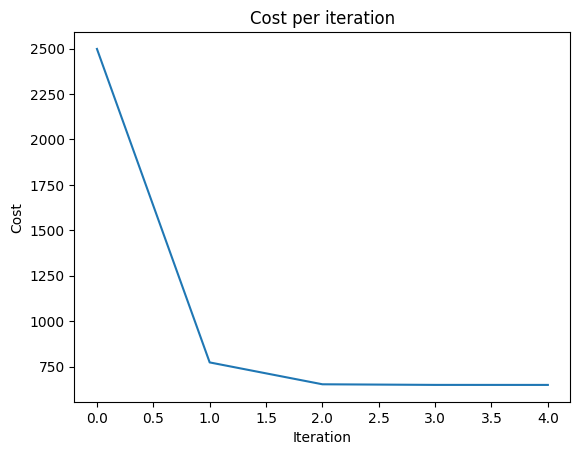

In [ ]:
plt.plot(costs)
plt.title("Cost per iteration")
plt.ylabel("Cost")
plt.xlabel("Iteration")

### Soft K-means

K-mean is highly sensitive to initialization.

One possible solution is to restart multiple time and use whichver result gives us the best objective.

Another possible solution is to have "*fuzzy*" membership in each class. This means each data point doesn't fully belong to one class or another, but rather there is an amount of membership.





Step 1 of the training will be changed as it will calculate cluster responsibilities

$$
r_k^{(n)} = \frac{\exp[-\beta d(m_k, x^{(n)})]}{ \sum_j \exp[-\beta d(m_j, x^{(n)}]}
$$

Step 2 has also been change to recalculate the responsibilty means.

$$
m_k = \frac{\sum_n r_k^{(n)}x^{(n)}}{\sum_nr_k^{(n)}}
$$

- $r$ is now always a fraction between 0 and 1, can interpret "hard k-means" to be where r is exactly 0 or 1. When $r^{(n)}$ is larger, it has more influence on the calculation of $m_k$.

- $r_k^{(n)}$ depends on the distance between each point and each cluster center

By using probabilites, Soft K-means allows a point to be equally belong to multiple clusters if it is extacly in the center of them. or have a non-zero probablity if the model is not completely sure which cluster the point belongs to.

While calculating the center, the points that are far away have less weight on changing the final center value.

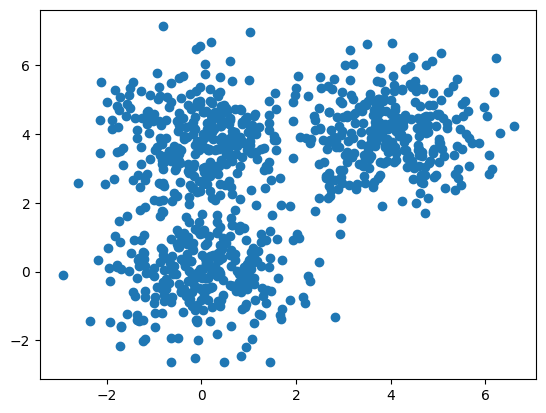

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

# assume 3 means
D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900 # number of samples
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

In [ ]:
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()

    print("Final cost", costs[-1])
    return M, R

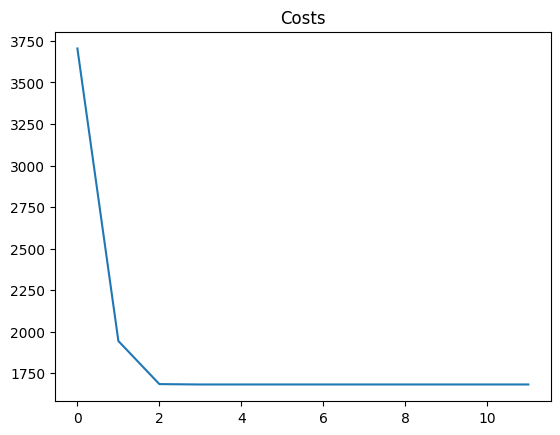

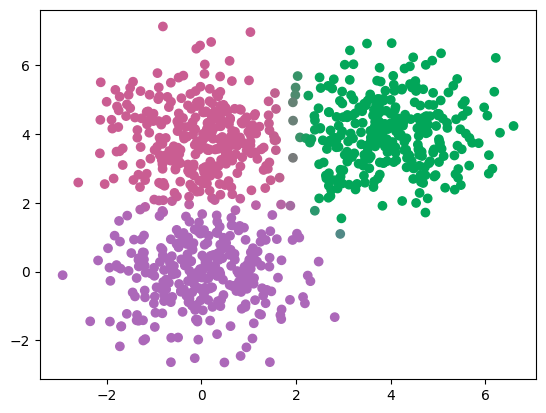

Final cost 1681.79850587853


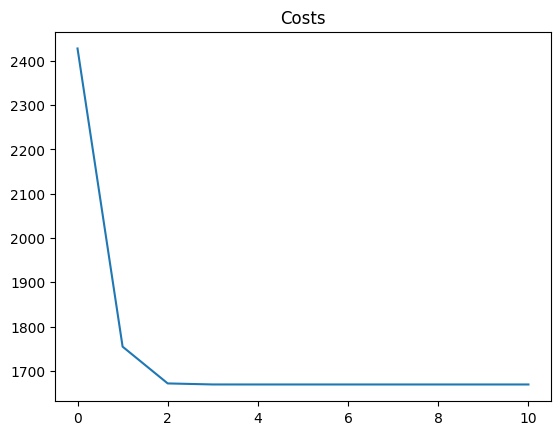

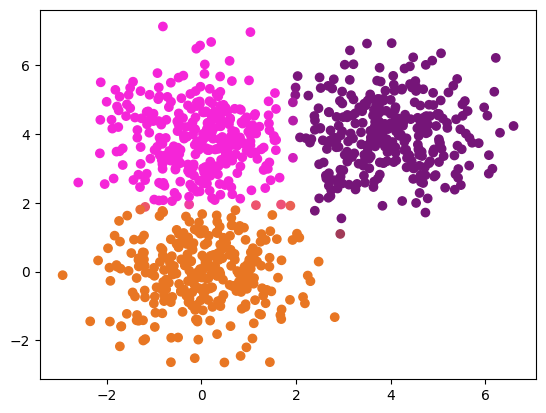

Final cost 1669.2189608319495


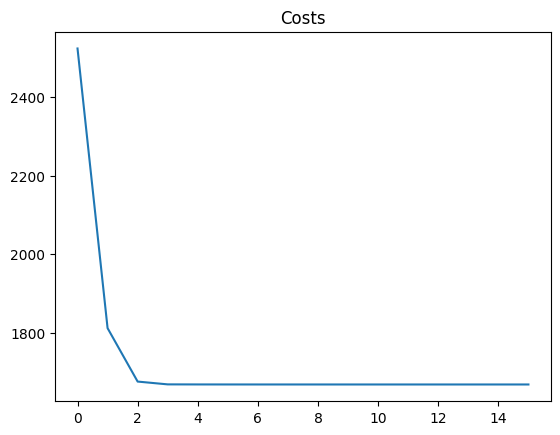

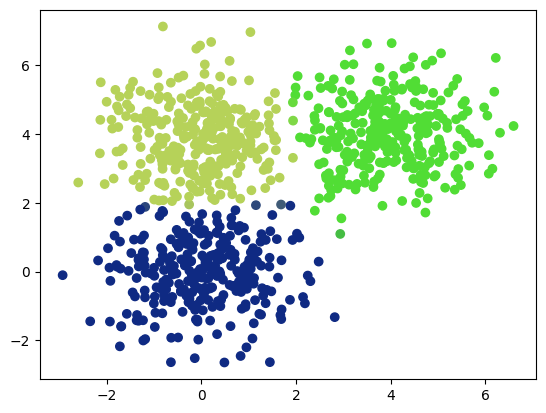

Final cost 1668.2167952767113


(array([[-0.0609382 ,  3.89353574],
        [ 3.95843429,  4.02307432],
        [ 0.02041357, -0.04782915]]),
 array([[5.09104623e-079, 2.80075661e-115, 1.00000000e+000],
        [6.42852832e-039, 2.00707946e-121, 1.00000000e+000],
        [5.05558744e-040, 1.04260536e-097, 1.00000000e+000],
        ...,
        [1.00000000e+000, 1.00292288e-030, 9.53018188e-080],
        [1.00000000e+000, 2.04633937e-069, 6.94481793e-063],
        [1.00000000e+000, 1.78444584e-058, 4.49419649e-163]]))

In [ ]:
K = 3 # luckily, we already know this
plot_k_means(X, K, beta=1.0, show_plots=True)

K = 3 # luckily, we already know this
plot_k_means(X, K, beta=3.0, show_plots=True)

K = 3 # luckily, we already know this
plot_k_means(X, K, beta=10.0, show_plots=True)

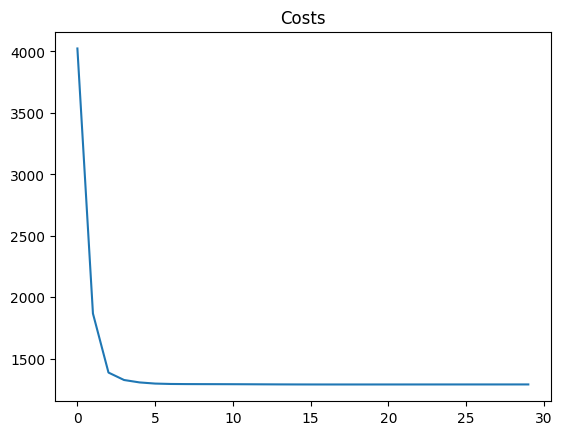

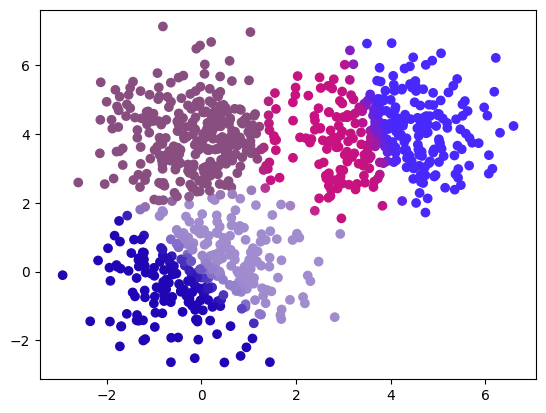

Final cost 1290.7536180704028


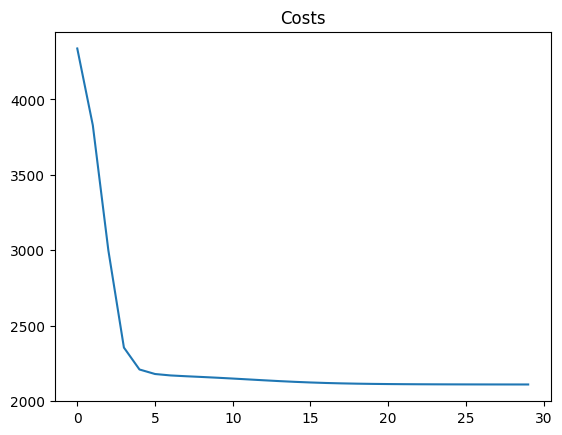

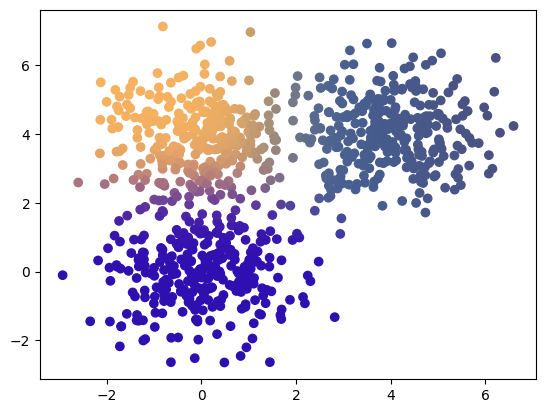

Final cost 2108.8711065814477


(array([[ 3.70771796,  4.01180788],
        [ 0.01467098,  0.25290634],
        [ 3.8444334 ,  4.02462802],
        [ 0.01284886,  0.19946221],
        [-0.07016916,  3.98901887]]),
 array([[3.14013603e-04, 4.94250345e-01, 2.34137065e-04, 5.03328667e-01,
         1.87283775e-03],
        [2.02838269e-04, 4.91582781e-01, 1.34478264e-04, 4.82204666e-01,
         2.58752361e-02],
        [9.39770048e-04, 4.91941340e-01, 6.65874418e-04, 4.82447277e-01,
         2.40057387e-02],
        ...,
        [1.40886077e-01, 6.56804879e-03, 1.09684969e-01, 5.71691023e-03,
         7.37143995e-01],
        [1.49312527e-02, 2.47956217e-02, 1.04476976e-02, 2.19932917e-02,
         9.27832136e-01],
        [2.61865379e-02, 3.62502902e-05, 1.91892674e-02, 2.90832977e-05,
         9.54558861e-01]]))

In [ ]:
K = 5 # what happens if we choose a "bad" K?
plot_k_means(X, K, max_iter=30, show_plots=True)

K = 5 # what happens if we change beta?
plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)

### K-Means Failing


In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np

def donut():
    N = 1000
    D = 2

    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    return X

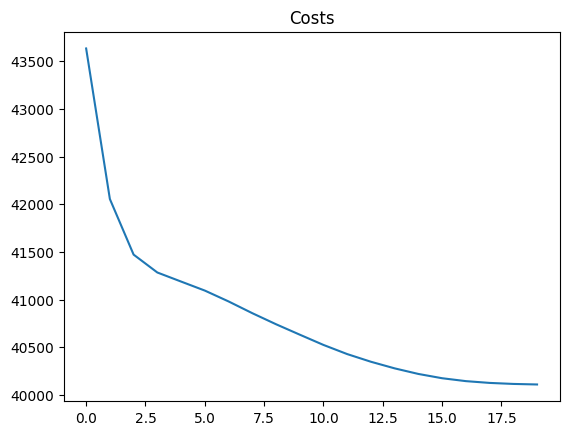

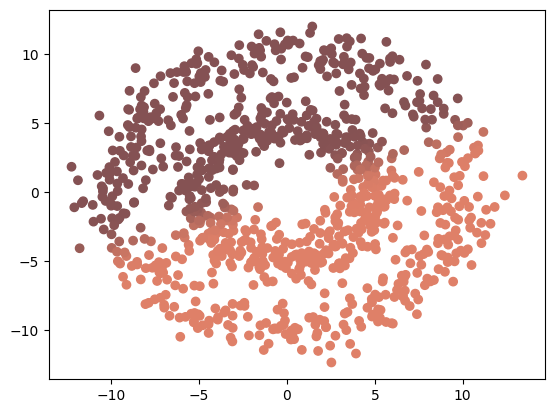

Final cost 40108.87052545653


(array([[-2.03707124,  4.52852884],
        [ 1.80411458, -4.28488003]]),
 array([[4.31931840e-05, 9.99956807e-01],
        [9.75211415e-02, 9.02478858e-01],
        [3.92150279e-01, 6.07849721e-01],
        ...,
        [9.99999993e-01, 6.55373175e-09],
        [2.96643989e-09, 9.99999997e-01],
        [9.91961117e-01, 8.03888265e-03]]))

In [ ]:
# donut
X = donut()
plot_k_means(X, 2, beta=0.1, show_plots=True)

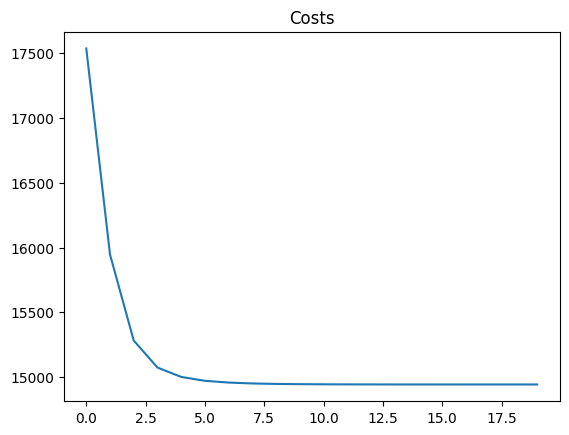

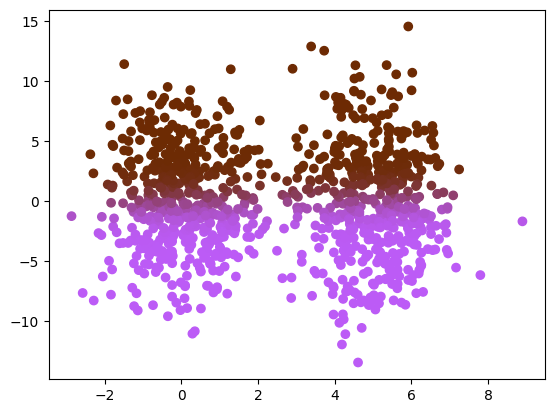

Final cost 14942.306372551779


(array([[ 2.67444472, -3.31316362],
        [ 2.32476741,  3.47564739]]),
 array([[9.99760078e-01, 2.39921783e-04],
        [3.25453546e-02, 9.67454645e-01],
        [5.65530030e-01, 4.34469970e-01],
        ...,
        [9.81435055e-01, 1.85649448e-02],
        [1.04943750e-01, 8.95056250e-01],
        [9.68962629e-01, 3.10373714e-02]]))

In [ ]:
# elongated clusters
X = np.zeros((1000, 2))
X[:500,:] = np.random.multivariate_normal([0, 0], [[1, 0], [0, 20]], 500)
X[500:,:] = np.random.multivariate_normal([5, 0], [[1, 0], [0, 20]], 500)
plot_k_means(X, 2, beta=0.1, show_plots=True)

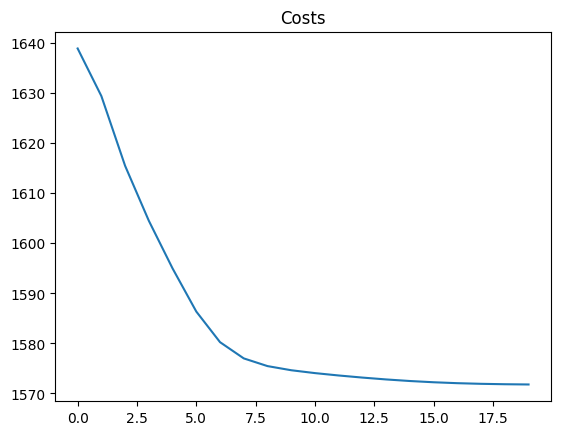

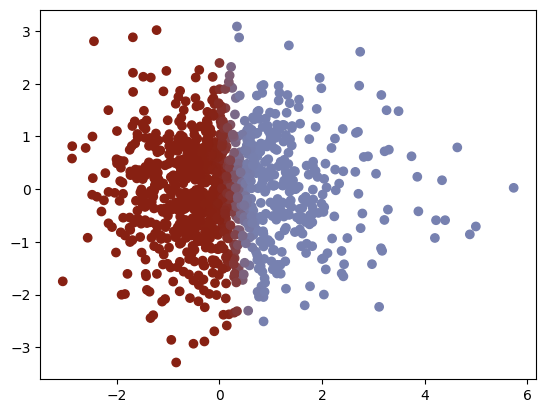

Final cost 1571.788392487601


(array([[-0.60517151, -0.06673175],
        [ 1.20143269,  0.06501366]]),
 array([[9.99999996e-01, 3.60906419e-09],
        [9.70188904e-01, 2.98110960e-02],
        [9.99756574e-01, 2.43426465e-04],
        ...,
        [9.08323580e-13, 1.00000000e+00],
        [7.37867326e-20, 1.00000000e+00],
        [2.61312771e-01, 7.38687229e-01]]))

In [ ]:
# different density
X = np.zeros((1000, 2))
X[:950,:] = np.array([0,0]) + np.random.randn(950, 2)
X[950:,:] = np.array([3,0]) + np.random.randn(50, 2)
plot_k_means(X, 2, show_plots=True)

### Evaluating Clustering


**Pros** of the previous cost function:
- Decreases on every round
- Makes perfect sense - we want data points to be close to cluster center that it belongs to, so squared distance should be low when responsibility → 1
- We want "low intra-cluster distances"
- We want "high inter-cluster distances"

**Cons**
- Really large dataset: Since it's the sum of squared distances, it grows with size of dataset
- Sensitive to scale: Data is in range 0…1, squared distances will be < 1, Data in range ~10e6, squared distances will be ~10e12
- Sensitive to K: if K=N (trivial case), cost = 0

**Possible Solution**
- Large dataset: Can just divide by N and D
- Scale: Can just normalize the data first (substract mean, divide by std)
- Sensitive to K: Not easy to adjust for

#### Purity

One way to evaluate a clustering is call purity.

$$
\text{Purity} = \frac{1}{N}\sum_{k=1}^K \max_{j=1\dots K}|c_k \cap t_j|
$$

- Balances by number of samples
- $c_k$ set of data points that belong to cluster k
- $t_j$ set of data points that belong to target class j
- We need to search over all j - max intersection means "this is the most likely class"

**Disadvantage**
- It requires true labels
  - if we have true labels, we might as well do supervised learning

#### Davies-Bouldin Index

An example of an "internal validation" method

$$
\text{DBI} = \frac{1}{K} \sum_{k=1}^K \max_{j\ne k} \left [ \frac{\sigma_k + \sigma_j}{d(c_k, c_j)} \right ]
$$

- $\sigma_k$ = average distance from each data point in cluster k to its center
  - "Sigma" is an appropriate symbol because that's like a std.
  - We need to account for probabilistic responsibilities
- $d(c_k,c_j)$ = distance from center of cluster k to center of cluster j

Ideally, we want numerator to be small and denominator to be large

Everything within a cluster should be closer together, and clusters should be far apart from other clusters

Lower DBI = better

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# assume 3 means
D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900 # number of samples
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

Y = np.array([0]*300 + [1]*300 + [2]*300)

In [ ]:
# hard labels
def purity2(Y, R):
    # maximum purity is 1, higher is better
    C = np.argmax(R, axis=1) # cluster assignments

    N = len(Y) # number of data pts
    K = len(set(Y)) # number of labels

    total = 0.0
    for k in range(K):
        max_intersection = 0
        for j in range(K):
            intersection = ((C == k) & (Y == j)).sum()
            if intersection > max_intersection:
                max_intersection = intersection
        total += max_intersection
    return total / N


def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

In [ ]:
# hard labels
def DBI2(X, R):
    N, D = X.shape
    _, K = R.shape

    # get sigmas, means first
    sigma = np.zeros(K)
    M = np.zeros((K, D))
    assignments = np.argmax(R, axis=1)
    for k in range(K):
        Xk = X[assignments == k]
        M[k] = Xk.mean(axis=0)
        # assert(Xk.mean(axis=0).shape == (D,))
        n = len(Xk)
        diffs = Xk - M[k]
        sq_diffs = diffs * diffs
        sigma[k] = np.sqrt( sq_diffs.sum() / n )


    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K


def DBI(X, M, R):
    # ratio between sum of std deviations between 2 clusters / distance between cluster means
    # lower is better
    N, D = X.shape
    K, _ = M.shape

    # get sigmas first
    sigma = np.zeros(K)
    for k in range(K):
        diffs = X - M[k] # should be NxD
        squared_distances = (diffs * diffs).sum(axis=1) # now just N
        weighted_squared_distances = R[:,k]*squared_distances
        sigma[k] = np.sqrt( weighted_squared_distances.sum() / R[:,k].sum() )

    # calculate Davies-Bouldin Index
    dbi = 0
    for k in range(K):
        max_ratio = 0
        for j in range(K):
            if k != j:
                numerator = sigma[k] + sigma[j]
                denominator = np.linalg.norm(M[k] - M[j])
                ratio = numerator / denominator
                if ratio > max_ratio:
                    max_ratio = ratio
        dbi += max_ratio
    return dbi / K

In [ ]:
print("Number of data points:", len(Y))
M, R = plot_k_means(X, len(set(Y)))
# Exercise: Try different values of K and compare the evaluation metrics
print("Purity:", purity(Y, R))
print("Purity 2 (hard clusters):", purity2(Y, R))
print("DBI:", DBI(X, M, R))
print("DBI 2 (hard clusters):", DBI2(X, R))

Number of data points: 900
Final cost 1669.47725622746
Purity: 0.9683954773874984
Purity 2 (hard clusters): 0.9688888888888889
DBI: 0.6814702411136843
DBI 2 (hard clusters): 0.6801658529481255


### Choosing K

If we observe Cost vs K as K=1…N, a Hockey-stick shape (sharp decrease, then steady) will appear.

Meaning at some point increasing K only leads to marginal improvements (overfitting)

End of the sharp decrease is the ideal K.

Final cost 8151.826708792769
Final cost 3941.0706023948815
Final cost 1669.4772573054852
Final cost 1482.7230740323023
Final cost 1291.0837723410873
Final cost 1105.375519544254
Final cost 1032.93126616541
Final cost 885.8897955113329
Final cost 808.4714206196887


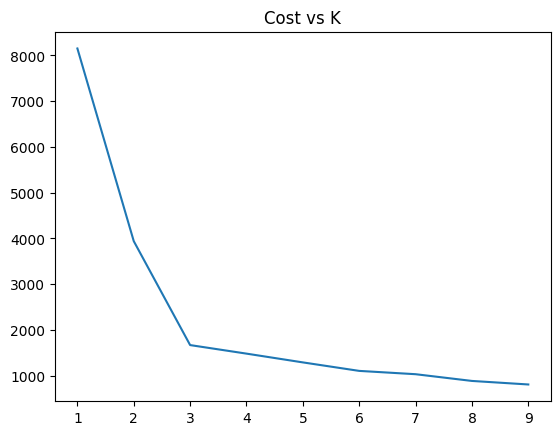

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np
import matplotlib.pyplot as plt

costs = np.empty(10)
costs[0] = None
for k in range(1, 10):
  M, R = plot_k_means(X, k, show_plots=False)
  c = cost(X, R, M)
  costs[k] = c

plt.plot(costs)
plt.title("Cost vs K")
plt.show()

## Hierarchical Clustering

- Specifically: Agglomerative Clustering
- Greedy algorithm
- Basic idea:
  - Start with set of points
  - Merge the 2 closest
  - Repeat until you only have 1 group of all the points

**Valid Distance Mertrics**

-  $d(x,y) \ge 0$ Non-ngeativity or separation axiom
- $d(x,y) = 0 \Leftrightarrow x = y$ Identity of indiscernibles
- $d(x,y) = d(y,x)$ Symmetry
- $d(x,z) \le d(x,y) + d(y,z)$ Subadditivity or triangle inequality

### Joining Clusters


#### Single-Linkage

> d(clusterA, clusterB) = min distance between any 2 points, 1 from A, 1 from B

```
min_dist = Infinity
for p1 in cluster1:
  for p2 in cluster2:
    min_dist = min( d(p1,p2), min_dist)
```



**Chaning Effect**
- Just keep choosing the thing beside our current cluster, in the end, the total points are very far apart

#### Complete-Linkage

> d(clusterA, clusterB) = max distance between any 2 points, 1 from A, 1 from B

```
max_dist = 0
for p1 in cluster1:
  for p2 in cluster2:
    max_dist = max( d(p1,p2), max_dist)
```

#### Mean Distance (UPGMA)

> Taking the mean distance from all points

```
dist = 0
for p1 in cluster1:
  for p2 in cluster2:
    dist += d(p1,p2)
dist = dist / (len(cluster1) * len(cluster2))
```

#### Ward's Criterion

> Look at each pair of clusters and see how much the variance would increase if we join them together.

You can imagine that if clusters are very far apart after joining them together the variance will be very large so we'll avoid that by joining clusters that are very close together.

$$
\text{SS} = \sum_j \sum_{i\in R_j} (x_i - m_j)^2 \\
\text{Merging cost:} \\
\delta = \sum_i (x_i - \bar x)^2 - \sum_{i\in A}(x_i - \bar a)^2 - \sum_{i\in B} (x_i - \bar b )^2 \\= \frac{n_an_b}{n_a+n_b}(\bar a -  \bar b )^2
$$

### Implementation

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900 # number of samples
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

Z.shape: (899, 4)


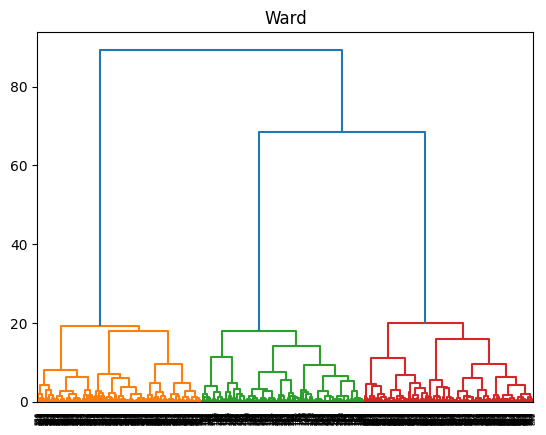

In [ ]:
Z = linkage(X, 'ward')
print("Z.shape:", Z.shape)

# Z has the format [idx1, idx2, dist, sample_count]
# therefore, its size will be (N-1, 4)

# from documentation:
# A (n-1) by 4 matrix Z is returned. At the i-th iteration,
# clusters with indices Z[i, 0] and Z[i, 1] are combined to
# form cluster n + i. A cluster with an index less than n
# corresponds to one of the original observations.
# The distance between clusters Z[i, 0] and Z[i, 1] is given
# by Z[i, 2]. The fourth value Z[i, 3] represents the number
# of original observations in the newly formed cluster.
plt.title("Ward")
dendrogram(Z)
plt.show()

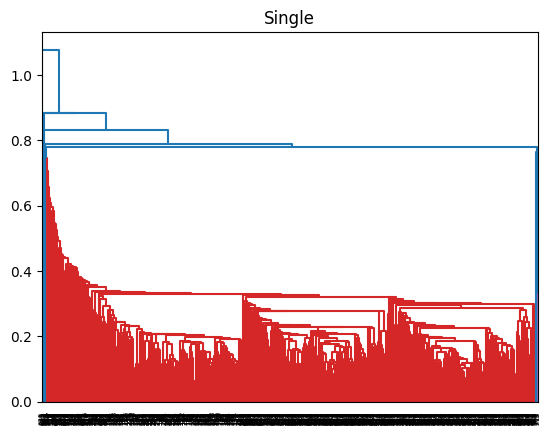

In [ ]:
Z = linkage(X, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

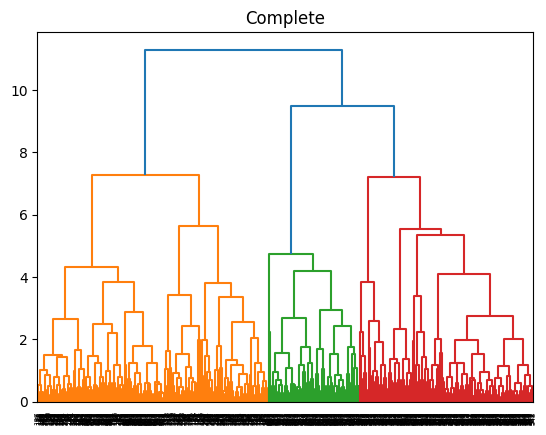

In [ ]:
Z = linkage(X, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

### Application Examples


#### DNA Sequence Clustering

Applying Hierarchical Clustering to biological data: DNA sequences

- Simualte evolution
- random mutation
- not interested in the 'fitness' of any particular mutation, just want to see what happens if we try to build a tree out of the DNA.

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import random
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# our genetic code
code = ['A', 'T', 'C', 'G']


# convert list of integers to corresponding letters
def to_code(a):
  return [code[i] for i in a]


# distance between 2 DNA strands
def dist(a, b):
  return sum(i != j for i, j in zip(a, b))


# generate offspring by modifying some characters in the code
def generate_offspring(parent):
  return [maybe_modify(c) for c in parent]


# modify letter c with probability ~1/1000
def maybe_modify(c):
  if np.random.random() < 0.001:
    return np.random.choice(code)
  return c

In [ ]:
# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

In [ ]:
# create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]
for i in range(num_generations):

  next_generation = []
  for parent in current_generation:
    # each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1

    # generate the offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)

  current_generation = next_generation

  # limit the number of offspring
  random.shuffle(current_generation)
  current_generation = current_generation[:max_offspring_per_generation]
  if (i+1) % 10 == 0:
    print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))

Finished creating generation 11 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000
Finished creating generation 31 / 100, size = 1000
Finished creating generation 41 / 100, size = 1000
Finished creating generation 51 / 100, size = 1000
Finished creating generation 61 / 100, size = 1000
Finished creating generation 71 / 100, size = 1000
Finished creating generation 81 / 100, size = 1000
Finished creating generation 91 / 100, size = 1000


In [ ]:
# create distance matrix
# note: you can also use scipy's pdist for this
# but NOT sklearn's pairwise_distances function
# which does not return a symmetric matrix
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    if i == j:
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i,j] = dist(a, b)
    else:
      dist_matrix[i,j] = dist_matrix[j,i]

dist_array = ssd.squareform(dist_matrix)

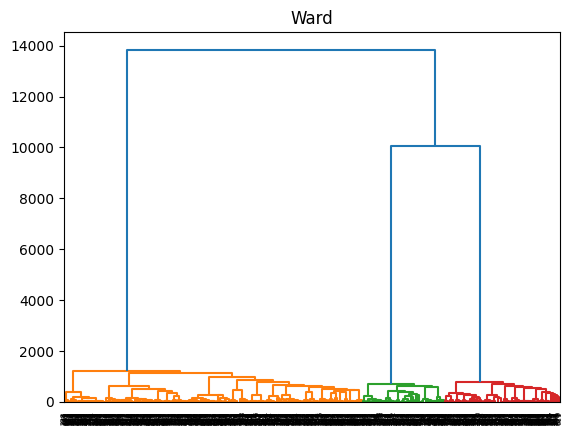

In [ ]:
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

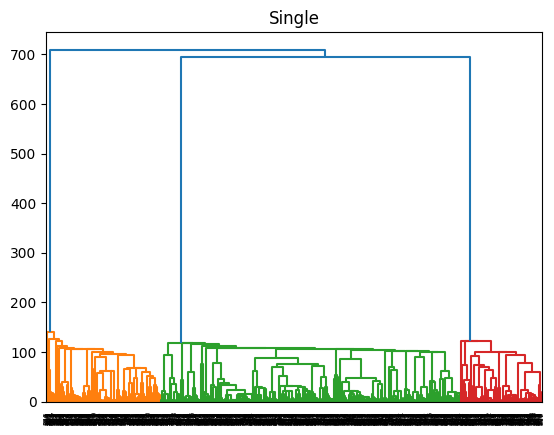

In [ ]:
Z = linkage(dist_array, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

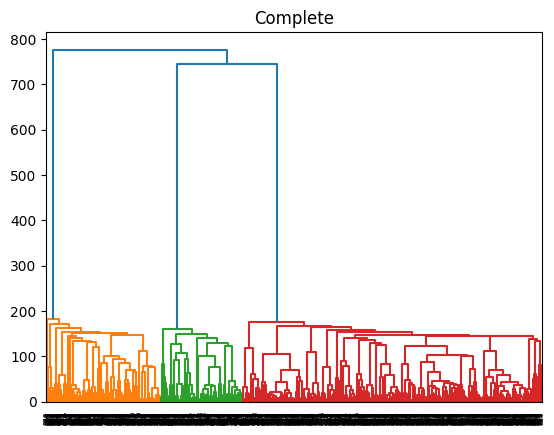

In [ ]:
Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

#### Tweet Clustering (TF-IDF)

Download the dataset from https://www.kaggle.com/datasets/benhamner/clinton-trump-tweets, unzip, and upload to `tweets.csv`

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import pairwise_distances ### fast, but result not symmetric

# load stopwords
# selected after observing results without stopwords
stopwords = [
  'the',
  'about',
  'an',
  'and',
  'are',
  'at',
  'be',
  'can',
  'for',
  'from',
  'if',
  'in',
  'is',
  'it',
  'of',
  'on',
  'or',
  'that',
  'this',
  'to',
  'you',
  'your',
  'with',
]

# find urls and twitter usernames within a string
url_finder = re.compile(r"(?:\@|https?\://)\S+")

In [ ]:
def filter_tweet(s):
  s = s.lower() # downcase
  s = url_finder.sub("", s) # remove urls and usernames
  return s

### load data ###
df = pd.read_csv('./tweets.csv')
text = df.text.tolist()
text = [filter_tweet(s) for s in text]


# transform the text into a data matrix
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords)
X = tfidf.fit_transform(text).todense()


# subsample for efficiency
# remember: calculating distances is O(N^2)
N = X.shape[0]
idx = np.random.choice(N, size=2000, replace=False)
x = X[idx]
labels = df.handle[idx].tolist()

In [ ]:
# proportions of each label
# so we can be confident that each is represented equally
pTrump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) / len(labels)
print("proportion @realDonaldTrump: %.3f" % pTrump)
print("proportion @HillaryClinton: %.3f" % (1 - pTrump))

proportion @realDonaldTrump: 0.503
proportion @HillaryClinton: 0.497


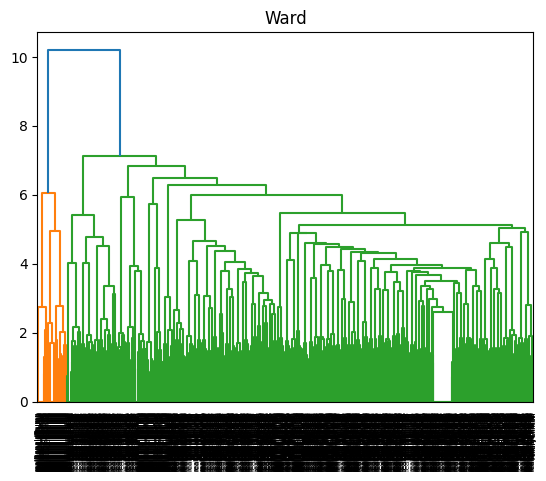

In [ ]:
# transform the data matrix into pairwise distances list
dist_array = pdist(x)

# calculate hierarchy
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()

In [ ]:
### hits max recursion depth
# Z = linkage(dist_array, 'single')
# plt.title("Single")
# dendrogram(Z, labels=labels)
# plt.show()

# Z = linkage(dist_array, 'complete')
# plt.title("Complete")
# dendrogram(Z, labels=labels)
# plt.show()


# convert labels to (1, 2), not (0, 1)
# since that's what's returned by fcluster
Y = np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])


# get cluster assignments
# threshold 9 was chosen empirically to yield 2 clusters
C = fcluster(Z, 9, criterion='distance') # returns 1, 2, ..., K
categories = set(C)
# sanity check: should be {1, 2}
print("values in C:", categories)

values in C: {1, 2}


In [ ]:
### calculate the purity of our clusters ###
def purity(true_labels, cluster_assignments, categories):
  # maximum purity is 1, higher is better
  N = len(true_labels)

  total = 0.0
  for k in categories:
    max_intersection = 0
    for j in categories:
      intersection = ((cluster_assignments == k) & (true_labels == j)).sum()
      if intersection > max_intersection:
        max_intersection = intersection
    total += max_intersection
  return total / N

print("purity:", purity(Y, C, categories))
# we know the smaller cluster is the trump cluster
#
# important note: we call it the trump cluster from
# observing AFTER the fact that most tweets in this
# cluster are by trump
# we do NOT use those labels to create the cluster
#
# we create the clusters using a distance-based
# algorithm which knows nothing about the labels,
# just the tf-idf scores.
#
# it just so happens that most of the tweets in
# one of the clusters is by trump, and that this
# cluster is very small
if (C == 1).sum() < (C == 2).sum():
  d = 1
  h = 2
else:
  d = 2
  h = 1

purity: 0.5545


In [ ]:
actually_donald = ((C == d) & (Y == 1)).sum()
donald_cluster_size = (C == d).sum()
print("purity of @realDonaldTrump cluster:", float(actually_donald) / donald_cluster_size)

purity of @realDonaldTrump cluster: 0.9752066115702479


In [ ]:
actually_hillary = ((C == h) & (Y == 2)).sum()
hillary_cluster_size = (C == h).sum()
print("purity of @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)

purity of @HillaryClinton cluster: 0.5274081958488558


In [ ]:
# just for interest, how would a classifier do?
# note: classification is always easier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(np.asarray(X), df.handle)
print("classifier score:", rf.score(np.asarray(X), df.handle))

# same as mnist
# classifier yields almost 100% accuracy
# but purity of clustering is much lower

classifier score: 0.9553072625698324


In [ ]:
# what words have the highest tf-idf in cluster 1? in cluster 2?
w2i = tfidf.vocabulary_

# tf-idf vectorizer todense() returns a matrix rather than array
# matrix always wants to be 2-D, so we convert to array in order to flatten
d_avg = np.array(x[C == d].mean(axis=0)).flatten()
d_sorted = sorted(w2i.keys(), key=lambda w: -d_avg[w2i[w]])

print("\nTop 10 'Donald cluster' words:")
print("\n".join(d_sorted[:10]))

h_avg = np.array(x[C == h].mean(axis=0)).flatten()
h_sorted = sorted(w2i.keys(), key=lambda w: -h_avg[w2i[w]])

print("\nTop 10 'Hillary cluster' words:")
print("\n".join(h_sorted[:10]))


Top 10 'Donald cluster' words:
thank
trump2016
makeamericagreatagain
my
america
will
great
all
new
we

Top 10 'Hillary cluster' words:
trump
hillary
we
will
he
our
not
donald
great
have


## Gaussian Mixture Model (GMM)

- Just a generalization of K-Means Clustering
- Based on Gaussian Distribution
- Statistics people call it the "Normal Distribution", but it's not called a ~"Normal Mixture Model"~

### Single Guassion

Measure all data, and "fitting" a guassian model.

This is called "Maximum Likelihood Estimation" MLE.

$$
Dataset: \{x_1, \cdots, x_N \} \\
L = \prod_{i=1}^N \frac{1}{\sqrt{2\pi \sigma^2}} \exp (- \frac{1}{2} \frac{(x_i-\mu)^2}{\sigma^2} ) \\
$$

Want to find: $\mu$ and $\sigma^2$

**Solution**

In order to max L, we must use calculus. Find the extreme point (where derivative is 0), check 2nd derivative, etc.

Why max L? We want to find parameters that make the data "more likely"


#### Log-Likelihood

`log()` is a monotonically increasing function, thus if A > B, the log(A) > log(B).

Taking the log, makes the computation easier

$$
\log L = \sum_{i=1}^N \left \{ -\frac{1}{2} (2\pi \sigma^2)- \frac{1}{2} \frac{(x_i-\mu)^2}{\sigma^2} \right \} \\
$$

**Differentiate**

$$
\frac{\partial \log L}{\partial \mu} = 0,
\frac{\partial \log L}{\partial \sigma^2} = 0 \\
$$

Solving μ

$$
\frac{\partial \log L}{\partial \mu} = \sum_{i=1}^N - \frac{(x_i - u)}{\sigma^2} = 0 \Leftrightarrow \hat \mu = \frac{1}{N} \sum_{i=1}^N x_i
$$

Solving $\sigma^2$

Let: $v=\sigma^2$

$$
\frac{\partial \log L}{\partial v} = \sum_{i=1}^N - \frac{1}{2}\frac{1}{v} - \frac{1}{2}(x_i - \mu )^2(-1)\frac{1}{v^2} = 0 \\
\sum_{i=1}^N v - (x_i - \mu)^2 = 0 \Leftrightarrow \hat \sigma^2 = \hat v = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2
$$




### Mixture of Gaussians

When the data is a multimodal distribution, a single gassian can not fit all data.

$$
p(x) = \pi_1N(x; \mu_1,\sigma_1^2)+\pi_2N(x; \mu_2,\sigma_2^2)
$$

The mixture of proportions must sum to 1.




We still want to maximize L wrt parameters:
- $\mu_1, \sigma_1^2, \mu_2, \sigma_2^2, \pi_1, \pi_2$
  - For K Gaussians, we'd have 3K parameteres


$$
L = \prod_{i=1}^N \left [
\pi_1 \frac{1}{\sqrt{2\pi \sigma_1^2}} \exp (- \frac{1}{2} \frac{(x_i-\mu_1)^2}{\sigma_1^2} ) +
\pi_2 \frac{1}{\sqrt{2\pi \sigma_2^2}} \exp (- \frac{1}{2} \frac{(x_i-\mu_2)^2}{\sigma_2^2} )
\right ]
$$


$$
\log L = \sum_{i=1}^N \sum_{k=1}^K \pi_k \frac{1}{\sqrt{2\pi \sigma_k^2}} \exp (- \frac{1}{2} \frac{(x_i-\mu_k)^2}{\sigma_k^2}) \\
$$

We can not set this to zero and solve, we'd have to use iterative algorithms like gradient descent.

Another algorithm could be EM.

### Expectation Maximization (EM)

EM (Expectation Maximization) is a commonly used algorithm for optimazation.

$\displaystyle{
\text{In a loop:} \\\quad
\text{ # E-Step} \\\quad
\gamma(i,k) = \frac{
  \pi_kN(x_i; \mu_k, \sum_k)
}{
  \sum_{j=1}^K \pi_j (x_i; \mu_k, \sum_j)
} \\\quad
\text{ # M-step} \\\quad
\mu_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(i,k)x_i \\\quad
\sum_k = \frac{1}{N_k} \sum_{i=1}^N \gamma(i,k)(x_i-\mu_k)(x_i-\mu_k)^T \\\quad
\pi_k = \frac{N_k}{N} \text{, where } N_k = \sum_{i=1}^N \gamma(i,k) \\
}$

- Assume vector observations: $X\sim N(\mu, \sum)$
- E-step: calclate responsibilities
- M-Step: calculate mean, covariance but they are weighted by responsibility.




$\pi_k = p(z=k)$
  - $z$ is a categorical hidden/latent variable ("cluster identity")

$$
p(x) = \sum_{k=1}^K \pi_kN(x; \mu_k,\sigma_k^2) = \sum_{k=1}^K p(z=k)p(x|z=k)
$$

### Implementation

In [ ]:
# https://deeplearningcourses.com/c/cluster-analysis-unsupervised-machine-learning-python
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

In [ ]:
def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    M = np.zeros((K, D)) # Mean
    R = np.zeros((N, K)) # Responsiblities
    C = np.zeros((K, D, D)) # Covariance
    pi = np.ones(K) / K # Prior - uniform

    # initialize M to random, initialize C to spherical with variance 1
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)

    lls = [] # Likelihood
    weighted_pdfs = np.zeros((N, K)) # we'll use these to store the PDF value of sample n and Gaussian k
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # this is the slow way
        # for k in range(K):
        #     for n in range(N):
        #         weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])

        # for k in range(K):
        #     for n in range(N):
        #         R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()

        # a faster way to do step 1: "vectorization"
        for k in range(K):
            weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk

            ## faster
            delta = X - M[k] # N x D
            Rdelta = np.expand_dims(R[:,k], -1) * delta # multiplies R[:,k] by each col. of delta - N x D
            C[k] = Rdelta.T.dot(delta) / Nk + np.eye(D)*smoothing # D x D
            ## slower
            # C[k] = np.sum(R[n,k]*np.outer(X[n] - M[k], X[n] - M[k]) for n in range(N)) / Nk + np.eye(D)*smoothing


        ll = np.log(weighted_pdfs.sum(axis=1)).sum()
        lls.append(ll)
        if i > 0:
            if np.abs(lls[i] - lls[i-1]) < 0.1:
                break

    plt.plot(lls)
    plt.title("Log-Likelihood")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R

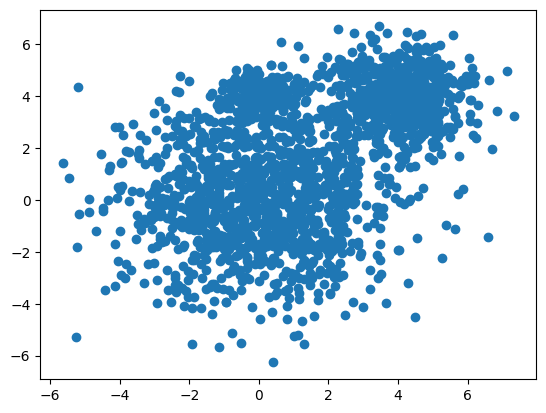

In [ ]:
# assume 3 means
D = 2 # so we can visualize it more easily
s = 4 # separation so we can control how far apart the means are
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 2000 # number of samples
X = np.zeros((N, D))
X[:1200, :] = np.random.randn(1200, D)*2 + mu1
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np.random.randn(200, D)*0.5 + mu3

# what does it look like without clustering?
plt.scatter(X[:,0], X[:,1])
plt.show()

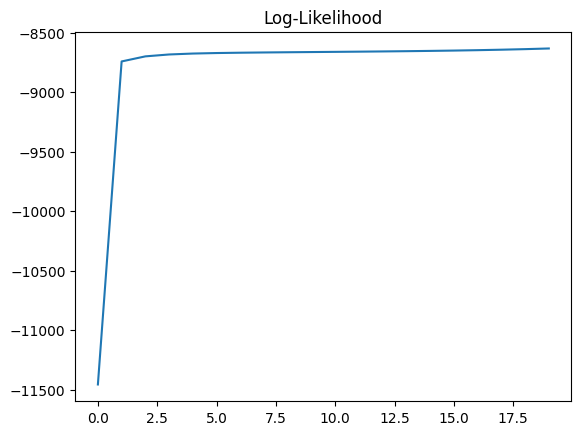

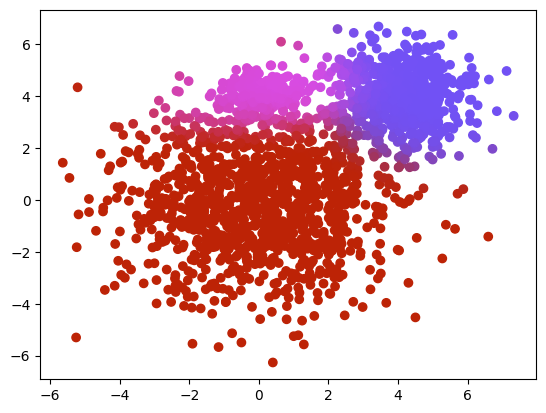

pi: [0.57588032 0.14679827 0.27732141]
means: [[ 0.02554039 -0.13593623]
 [ 0.38941022  3.9621065 ]
 [ 4.17658396  3.93028929]]
covariances: [[[ 3.72599601e+00  8.17424222e-02]
  [ 8.17424222e-02  3.57647850e+00]]

 [[ 1.62640648e+00  2.13537475e-01]
  [ 2.13537475e-01  4.46973973e-01]]

 [[ 8.71362529e-01 -2.96126891e-03]
  [-2.96126891e-03  9.99542732e-01]]]


array([[9.78721751e-01, 1.49265889e-05, 2.12633222e-02],
       [9.99960810e-01, 3.91901422e-05, 1.74454797e-10],
       [9.99507799e-01, 4.92201117e-04, 2.90745238e-11],
       ...,
       [2.85310061e-01, 7.10875376e-01, 3.81456322e-03],
       [8.71569425e-02, 9.12838620e-01, 4.43788299e-06],
       [2.47166470e-01, 7.52809954e-01, 2.35759730e-05]])

In [ ]:
K = 3
gmm(X, K)

### Singular Covariance

- Matrix equivalent of dividing by 0
- $C^{-1}$ is the matrix equivalent of $\frac{1}{C}$

Why does it occur?

We do a "1 oVer something" operation twice in both scalar/vector cases.

**When is the variance 0?**
- A single data point: Then $x-\mu=0 \rightarrow 0*0/N$
- All data points are the same: Then $x-\mu = 0 \rightarrow \sigma^2 = 0*0/N$

Can be avoid by giving covariance restriction to not overfit to data

### Kernel Density Estimation (KDE)

- A general method of estimating the distribution of a dataset

**KDE - General Case**

Possible choice for the kernel are uniform, triangular, and Gaussian

$$
f(x) = \frac{1}{N} \sum_{i=1}^N \varphi_h(x-x_i)
$$

- $\varphi$: kernel
- h: bandwidth

Scaling $h$ outside $\varphi$

$$
f(x) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h}\varphi(\frac{x-x_i}{h})
$$


$h$ controls how smooth or jagged the kernel density estimate is, and it's a hyperparameter.


**Gaussian Kernel Bandwith**

$$
\varphi(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}
$$